In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# User Data
user = pd.read_csv('user_table.csv')
# Online Data
test = pd.read_csv('test_table.csv', parse_dates= ['date'])

# Data Exploration

In [3]:
test.head()

user_id       date  source  device browser_language ads_channel  \
0   315281 2015-12-03  Direct     Web               ES         NaN   
1   497851 2015-12-04     Ads     Web               ES      Google   
2   848402 2015-12-04     Ads     Web               ES    Facebook   
3   290051 2015-12-03     Ads  Mobile            Other    Facebook   
4   548435 2015-11-30     Ads     Web               ES      Google   

       browser  conversion  test  
0           IE           1     0  
1           IE           0     1  
2       Chrome           0     0  
3  Android_App           0     1  
4      FireFox           0     1

In [4]:
user.head()

user_id sex  age    country
0   765821   M   20     Mexico
1   343561   F   27  Nicaragua
2   118744   M   23   Colombia
3   987753   F   27  Venezuela
4   554597   F   20      Spain

In [5]:
# Top Country is Mexico
user.describe(include = 'all')

user_id     sex            age country
count    452867.000000  452867  452867.000000  452867
unique             NaN       2            NaN      17
top                NaN       M            NaN  Mexico
freq               NaN  264485            NaN  128484
mean     499944.805166     NaN      27.130740     NaN
std      288676.264784     NaN       6.776678     NaN
min           1.000000     NaN      18.000000     NaN
25%      249819.000000     NaN      22.000000     NaN
50%      500019.000000     NaN      26.000000     NaN
75%      749543.000000     NaN      31.000000     NaN
max     1000000.000000     NaN      70.000000     NaN

In [6]:
# We can see the top ads_channels, browsers, browser_languages etc.
test.describe(include = 'all')

user_id                 date  source  device browser_language  \
count    453321.000000               453321  453321  453321           453321   
unique             NaN                    5       3       2                3   
top                NaN  2015-12-04 00:00:00     Ads     Web               ES   
freq               NaN               141163  181877  251565           377547   
first              NaN  2015-11-30 00:00:00     NaN     NaN              NaN   
last               NaN  2015-12-04 00:00:00     NaN     NaN              NaN   
mean     499937.514728                  NaN     NaN     NaN              NaN   
std      288665.193436                  NaN     NaN     NaN              NaN   
min           1.000000                  NaN     NaN     NaN              NaN   
25%      249816.000000                  NaN     NaN     NaN              NaN   
50%      500019.000000                  NaN     NaN     NaN              NaN   
75%      749522.000000                  NaN     NaN     NaN              NaN   
max     1000000.000000                  NaN     NaN     NaN              NaN   

       ads_channel      browser     conversion           test  
count       181877       453321  453321.000000  453321.000000  
unique           5            7            NaN            NaN  
top       Facebook  Android_App            NaN            NaN  
freq         68425       155135            NaN            NaN  
first          NaN          NaN            NaN            NaN  
last           NaN          NaN            NaN            NaN  
mean           NaN          NaN       0.049579       0.476446  
std            NaN          NaN       0.217073       0.499445  
min            NaN          NaN       0.000000       0.000000  
25%            NaN          NaN       0.000000       0.000000  
50%            NaN          NaN       0.000000       0.000000  
75%            NaN          NaN       0.000000       1.000000  
max            NaN          NaN       1.000000       1.000000

In [7]:
# Size
print user.shape
print test.shape

(452867, 4)
(453321, 9)


### Check for Null Values

In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null datetime64[ns]
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 31.1+ MB


There is missing user_ids for user so when we join it, we will not know about the users traits

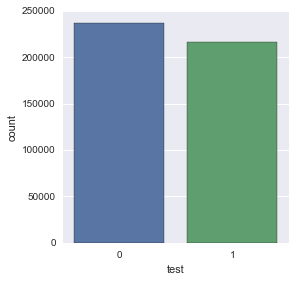

In [10]:
#Distribution of Test and Control
_ = sns.factorplot('test', data = test, kind = 'count')

It's about the same, so no problems there

In [11]:
# Let's Join both DataFrame
df = pd.merge(user, test, on = 'user_id', how = 'outer')

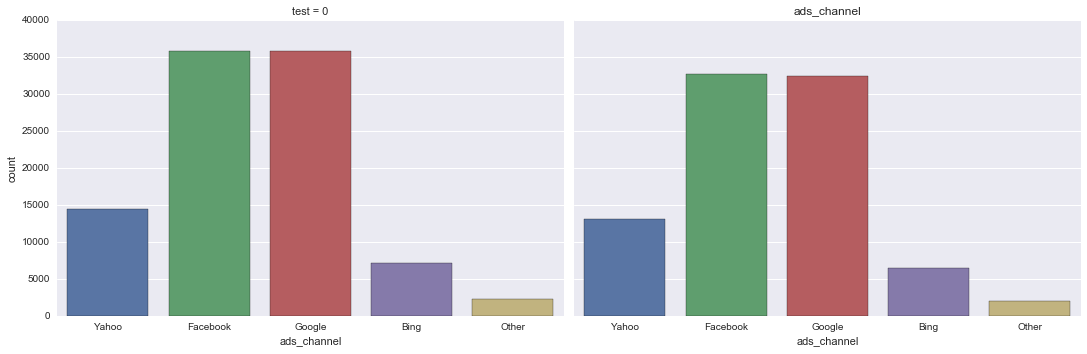

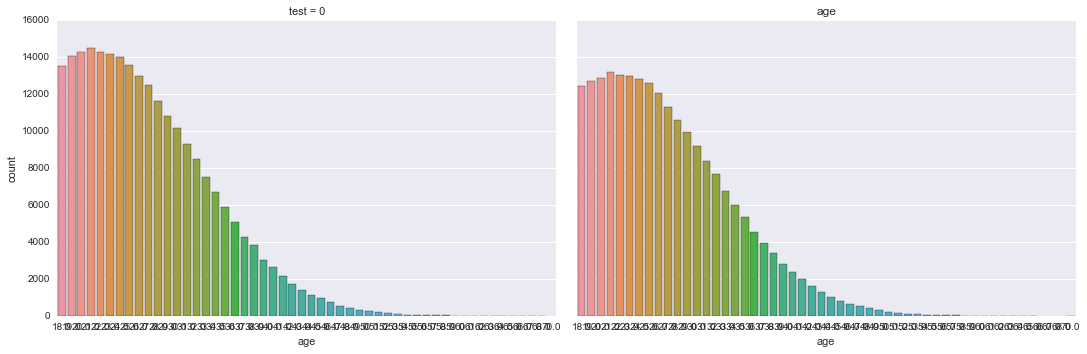

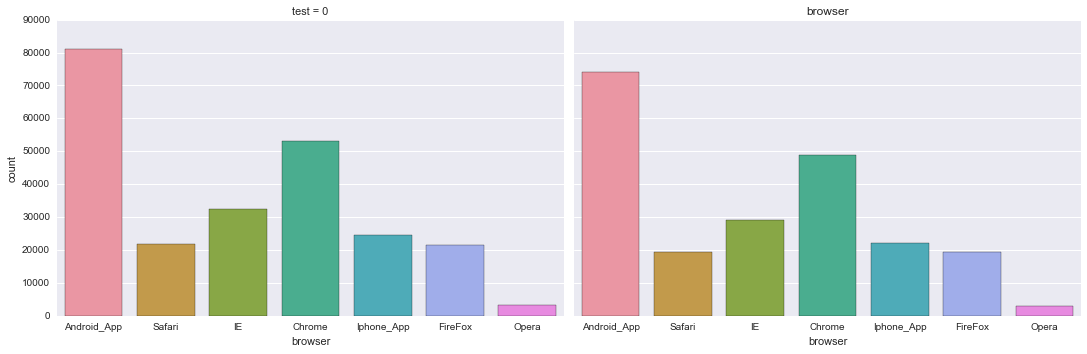

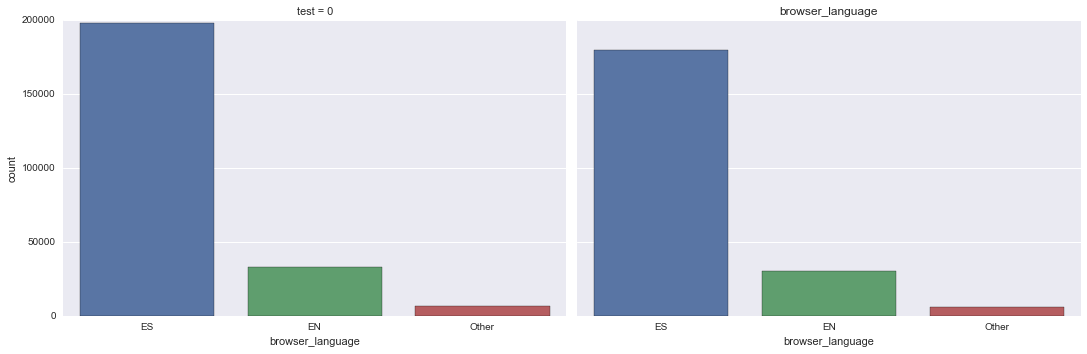

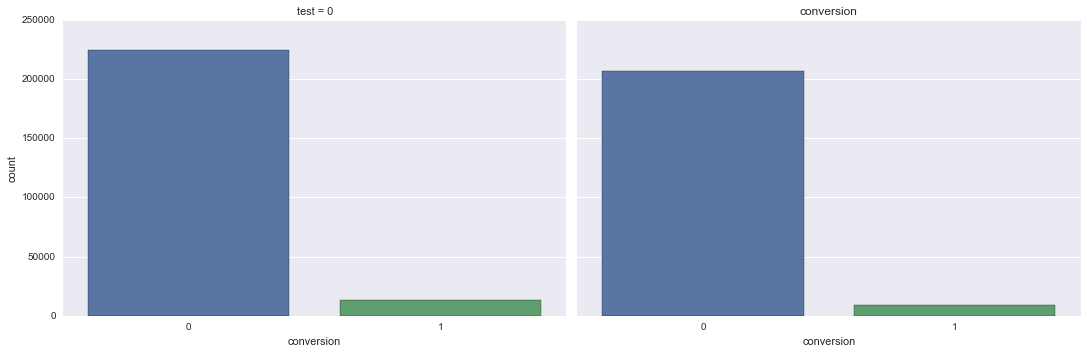

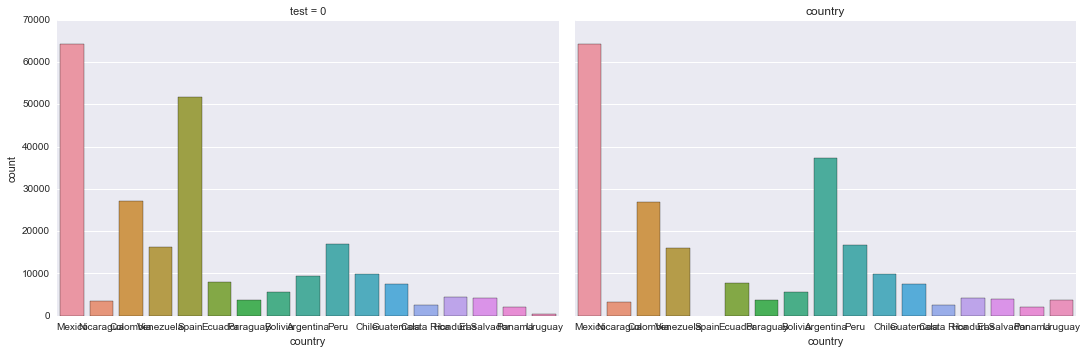

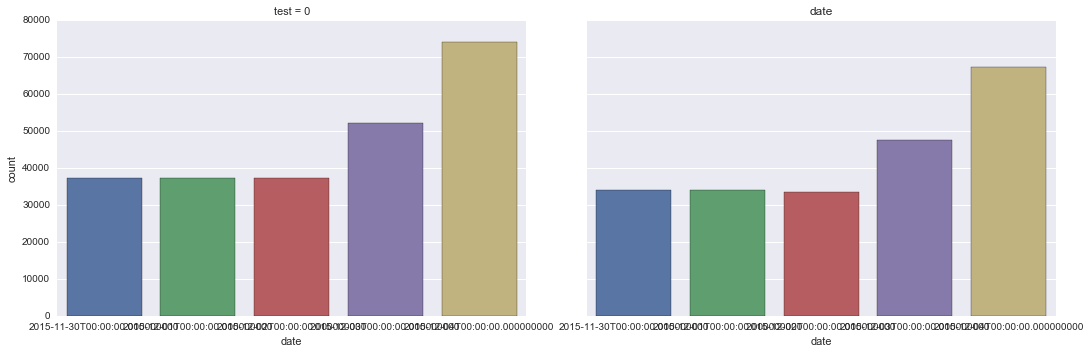

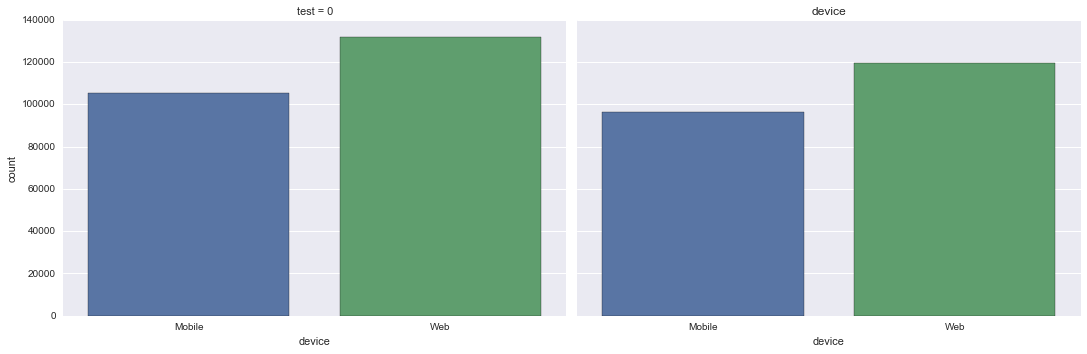

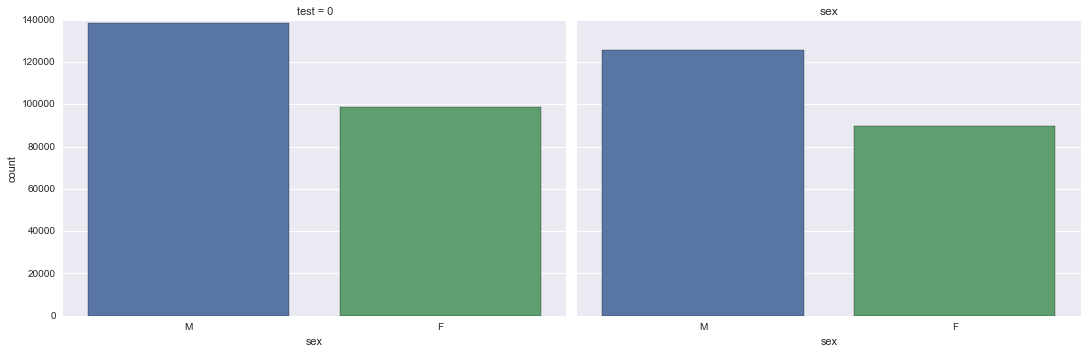

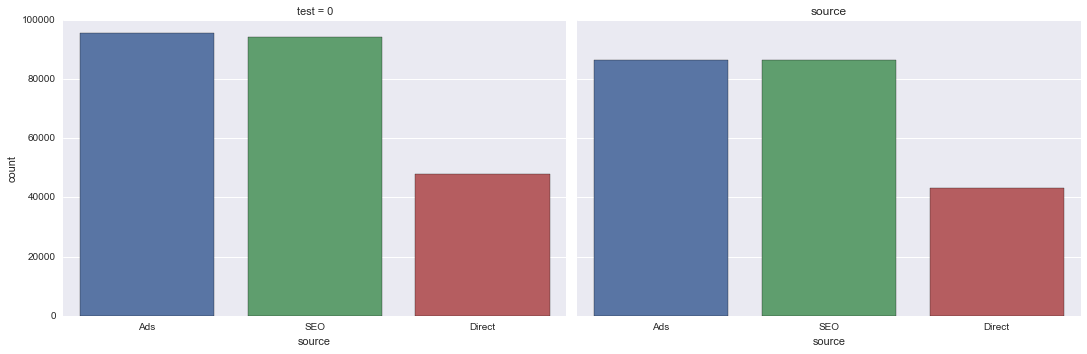

In [153]:
# Let's look at each feature's conversion in relation
#to whether it's a test or control sample
for i in df.columns.difference(['user_id', 'test']):
    sns.factorplot(i, data = df, kind = 'count', col = 'test', size = 5, aspect = 1.5)
    plt.title(i)

# Check Results

In [28]:
df[(df.test == 0) & (df.country == i)].conversion.sum()/float(df[(df.test == 0) & (df.country == i)].conversion.count())

0.046795523906408953

In [83]:
# We Know Spain had No Change
data = df[df.country != 'Spain']

In [178]:
test_data = data[data.test == 1].conversion
control_data = data[data.test == 0].conversion

print 'Results for the test %r'%(test_data.sum()/float(test_data.count()))
print 'Results for the control %r'%(control_data.sum()/float(control_data.count()))

Results for the test 0.043424713982118966
Results for the control 0.048330423160663091


### Over Time

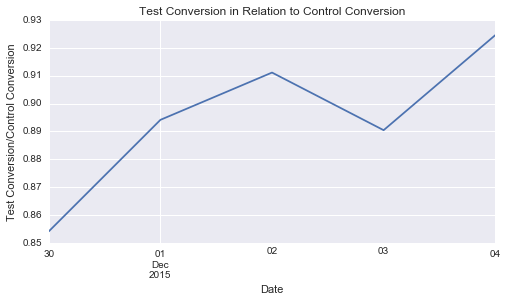

In [13]:
_ = (df[(df.test == 1) & (df.country != 'Spain')].groupby('date').mean()['conversion']/df[(df.test == 0)& (df.country != 'Spain')].groupby('date').mean()['conversion']).plot()
_.figure.set_size_inches(8,4)
plt.title('Test Conversion in Relation to Control Conversion')
plt.xlabel('Date')
_ = plt.ylabel('Test Conversion/Control Conversion')

The test has been consistently underperforming the control.

So when there was a common template we had more conversions, which seems suspicious! <br>
Having custom websites for each regions should have a better effect!<br><br>

<b>To double check let's see if the results were effected by either:</b>
1. Small Sample Size
2. Bias in test sample

## 1. Small Sample Size

In [180]:
data.date.value_counts()

2015-12-04    125033
2015-12-03     88204
2015-12-01     62911
2015-11-30     62903
2015-12-02     62488
Name: date, dtype: int64

So the a/b test ran for 5 days that could mean a small sample size but that's in conclusive 

## 2. Bias

<b>There are many ways to test bias but I'm going to try 2 here:<br></b>
a. Train a <u>Model</u> to see if it can predict whether it's the test or control sample<br>
(if the sample is unbiased then no features should be predictive)<br>
b. <u>T-test</u>: A t-test should reveal whether a feature's effect on conversion is statistically significant

### A. Training a Model To Test for Bias
### -Automating Detecting Bias

In [15]:
tree_df = df[df.columns.difference(['conversion'])].copy()
tree_df['age'] = tree_df[['age']].fillna(np.mean(tree_df.age))
tree_df.fillna('none', inplace= True)

In [16]:
ads_channel_dums = pd.get_dummies(tree_df.ads_channel, prefix= 'ads')
browser_dums = pd.get_dummies(tree_df.browser,prefix= 'browser')
browser_language_dums = pd.get_dummies(tree_df.browser_language,prefix= 'browser_language')
country_dums = pd.get_dummies(tree_df.country,prefix= 'country')
device_dums = pd.get_dummies(tree_df.device,prefix= 'device')
sex_dums = pd.get_dummies(tree_df.sex,prefix= 'sex')
source_dums = pd.get_dummies(tree_df.source,prefix= 'source')

dums_list = [ads_channel_dums, browser_dums,browser_language_dums,country_dums,device_dums,sex_dums,source_dums ]

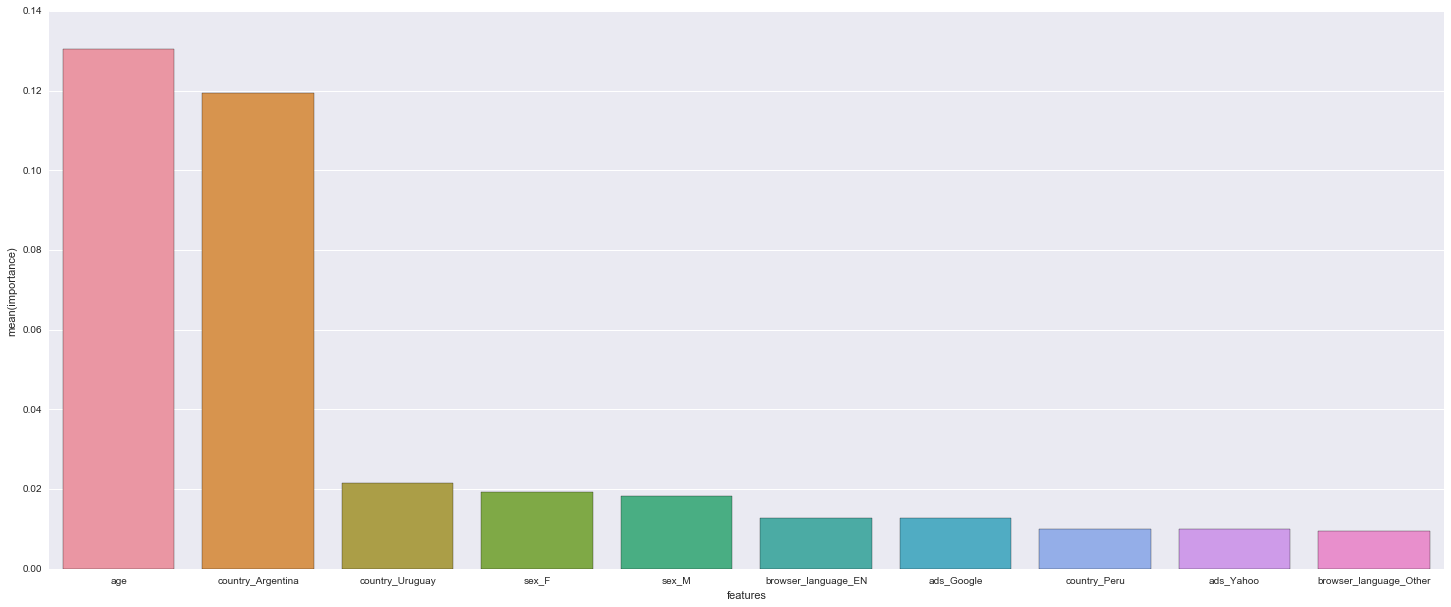

In [17]:
from sklearn.tree import DecisionTreeClassifier

X = tree_df[['age']].join(dums_list)
y = tree_df['test']
tree = DecisionTreeClassifier()
tree.fit(X, y)
features_significance = pd.DataFrame({'features': X.columns,\
          'importance': tree.feature_importances_}).sort_values('importance', ascending = False).iloc[1:11]
_ = sns.barplot(x = 'features', y = 'importance'
                  ,data = features_significance, orient = 'v')
_.figure.set_size_inches(25,10)

There are two very predictive features: age and when the Country was Argentina. This could indicate that the sample set isn't random!

## B. T-Tests

Let's test each features and see if it's effect on the control is statistically significant

### Checking Countries

In [181]:
country = []
conversion_test = []
conversion_control = []
p_vals = []
for i in data.country.value_counts().index:
    temp = data[data.country == i]
    cat1 = temp[data.test == 1].conversion
    cat2 = temp[data.test == 0].conversion
    ttest, p =stats.ttest_ind(cat2, cat1)
    country.append(i)
    conversion_test.append(cat1.sum()/float(len(cat1)))
    conversion_control.append(cat2.sum()/float(len(cat2)))

    ttest_vals.append(ttest)
    p_vals.append(p)
    
pd.DataFrame({'country': country, 
              'conversion_test': conversion_test,
              'conversion_control': conversion_control,
             'p_value': p_vals})\
[['country', 'p_value', 'conversion_test', 'conversion_control']]

/Users/Fernanhid/miniconda/envs/datasci27/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/Fernanhid/miniconda/envs/datasci27/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


country   p_value  conversion_test  conversion_control
0        Mexico  0.165547         0.051186            0.049495
1      Colombia  0.423733         0.050571            0.052089
2     Argentina  0.321766         0.013725            0.015071
3          Peru  0.771950         0.050604            0.049914
4     Venezuela  0.573740         0.048978            0.050344
5         Chile  0.302871         0.051295            0.048107
6       Ecuador  0.961512         0.048988            0.049154
7     Guatemala  0.572165         0.048647            0.050643
8       Bolivia  0.718877         0.047901            0.049369
9      Honduras  0.471721         0.047540            0.050906
10  El Salvador  0.248251         0.047947            0.053554
11     Paraguay  0.883702         0.049229            0.048493
12    Nicaragua  0.780351         0.054177            0.052647
13   Costa Rica  0.687863         0.054738            0.052256
14      Uruguay  0.882812         0.012907            0.012048
15       Panama  0.705361         0.049370            0.046796

<b> These p-values in indicate that that we cannot conclude that the difference <br> in dialects had any effect on
conversion</b>

### Age

In [175]:
# They are Very Different!!
from scipy import stats
import numpy as np

t_test_df = data[['age', 'test']].dropna()
cat1 = t_test_df[t_test_df.test == 1].age
cat2 = t_test_df[t_test_df.test == 0].age

ttest, p =stats.ttest_ind(cat1, cat2)
print 't-test independent', ttest
print p

t-test independent -1.30262768871
0.192702647982


We get the same thing when we deal with age, not significant!


### Conversion Source

In [177]:
source = []
conversion_test = []
conversion_control = []
p_vals = []
for i in data.source.value_counts().index:
    temp = data[data.source == i]
    cat1 = temp[data.test == 1].conversion
    cat2 = temp[data.test == 0].conversion
    ttest, p =stats.ttest_ind(cat1, cat2)
    source.append(i)
    conversion_test.append(cat1.sum()/float(len(cat1)))
    conversion_control.append(cat2.sum()/float(len(cat2)))

    ttest_vals.append(ttest)
    p_vals.append(p)
    
pd.DataFrame({'source': source, 
              'conversion_test': conversion_test,
              'conversion_control': conversion_control,
             'p_value': p_vals})\
[['source', 'p_value', 'conversion_test', 'conversion_control']]

/Users/Fernanhid/miniconda/envs/datasci27/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/Fernanhid/miniconda/envs/datasci27/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


source       p_value  conversion_test  conversion_control
0     Ads  6.488992e-07         0.043546            0.048754
1     SEO  4.565763e-04         0.043770            0.047430
2  Direct  4.382345e-06         0.042489            0.049267

The test becomes significant when we use other features!

# Conclusion

### <b> Three take aways that we can take from this: </b>

<b>1. If the Results Seem Unbelievable, They Probably Are</b> <br>
We intuitively know that a custom website for each region would yield better results.<br>
So when it didn't, it's important to take extra precautions to make sure that the test was <br>run appropriately,
in this case we found that the test sample wasn't indicative of the population.<br>
<b>2. By simply looking at feature distributions, we miss the subtley of sample bias</b> <br>
When we saw the distribution of features, all the features seemed balanced. There were a little <br>discrepancies in country but aged seemed balanced. If we had not run T-test or the decision tree to prove <br>statistical significance then we would of missed age as the major indicator of a biased data set. <br>When running an A/B test, the quality of the test is just important if not more important than the results. <br>
<b>3. We can Automate This Process Using Machine Learning</b> <br>
By building a model that can show us if any features can predict whether a user is in the test <br>or control sample, we can automate the process. We can set a threshold for feature significance and let the model <br>tell us automatically if the sample is biased or not! This gives us more time to deal with deeper subjects.<br>
